# Sentiment Analysis

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript
episode 1,"Original release date: November 23, 2022 Wedne..."
episode 2,"Original release date: November 23, 2022 Wedne..."
episode 3,"Original release date: November 23, 2022 Wedne..."
episode 4,"Original release date: November 23, 2022 Wedne..."
episode 5,"Original release date: November 23, 2022 32 ye..."
episode 6,"Original release date: November 23, 2022 Wedne..."
episode 7,"Original release date: November 23, 2022 At Ma..."
episode 8,"Original release date: November 23, 2022 Wedne..."


In [14]:
episodes=[]
for i in range(8):
    episodes.append(f"episode {i+1}")
data["episodes"]=episodes

In [15]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity,episodes
episode 1,"Original release date: November 23, 2022 Wedne...",0.067262,0.539332,episode 1
episode 2,"Original release date: November 23, 2022 Wedne...",0.034825,0.531343,episode 2
episode 3,"Original release date: November 23, 2022 Wedne...",0.093071,0.542951,episode 3
episode 4,"Original release date: November 23, 2022 Wedne...",0.095280,0.553902,episode 4
episode 5,"Original release date: November 23, 2022 32 ye...",0.058089,0.532867,episode 5
episode 6,"Original release date: November 23, 2022 Wedne...",0.052986,0.532090,episode 6
episode 7,"Original release date: November 23, 2022 At Ma...",0.014737,0.526131,episode 7
episode 8,"Original release date: November 23, 2022 Wedne...",0.021899,0.579232,episode 8


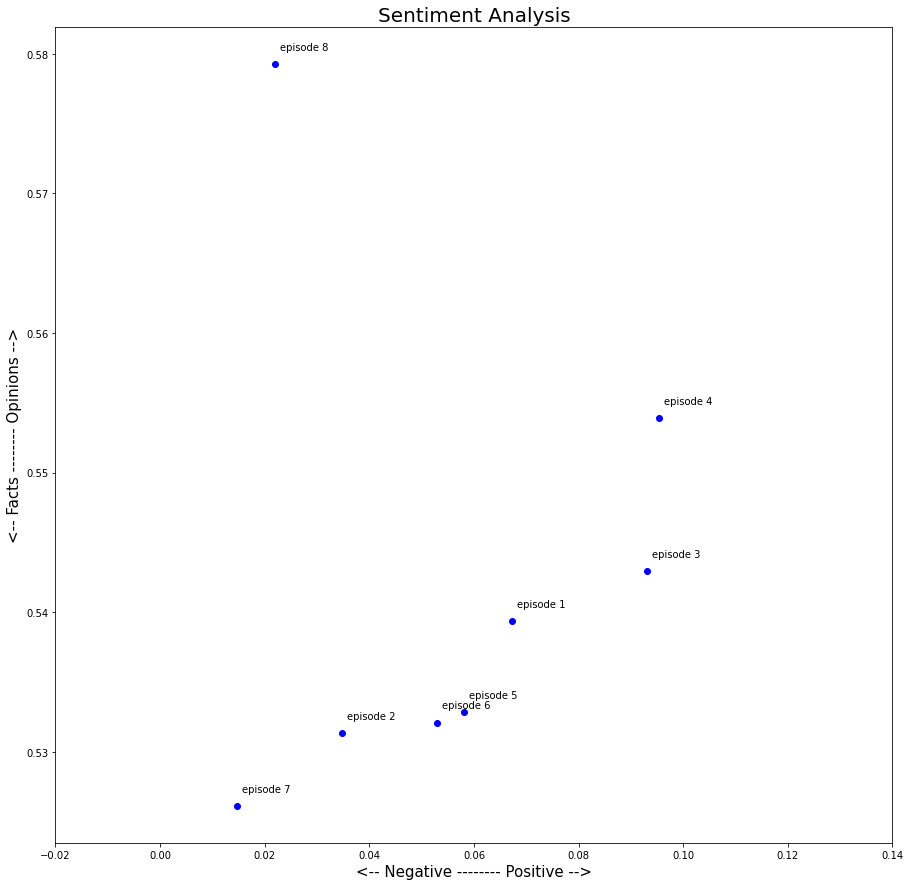

In [16]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]

for index, episode in enumerate(data.index):
    x = data.polarity.loc[episode]
    y = data.subjectivity.loc[episode]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data["episodes"][index], fontsize=10)
    plt.xlim(-.02 ,.14) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
import os
folder_name = "results"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the plot in the "results" folder
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')
file_name = "sentiment_analysis.png"  # Specify the desired file name and extension
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)

plt.show()

In [17]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [18]:
# Let's take a look at our data again
data

,transcript,polarity,subjectivity,episodes
episode 1,"Original release date: November 23, 2022 Wedne...",0.067262,0.539332,episode 1
episode 2,"Original release date: November 23, 2022 Wedne...",0.034825,0.531343,episode 2
episode 3,"Original release date: November 23, 2022 Wedne...",0.093071,0.542951,episode 3
episode 4,"Original release date: November 23, 2022 Wedne...",0.095280,0.553902,episode 4
episode 5,"Original release date: November 23, 2022 32 ye...",0.058089,0.532867,episode 5
episode 6,"Original release date: November 23, 2022 Wedne...",0.052986,0.532090,episode 6
episode 7,"Original release date: November 23, 2022 At Ma...",0.014737,0.526131,episode 7
episode 8,"Original release date: November 23, 2022 Wedne...",0.021899,0.579232,episode 8


In [19]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Original release date: November\xa023,\xa02022 Wednesday Addams, a high-school student, finds her brother\xa0Pugsley\xa0tied up in a locker. She sees a psychic vision of his bullies whom she attempts to kill in revenge but gets expelled. Her parents,\xa0Morticia\xa0and\xa0Gomez, decide to enroll her in Nevermore Academy, a school for outcasts. Meanwhile, a hiker is killed by an unknown creature near Nevermore. Wednesday’s parents release\xa0Thing, a sentient disembodied hand, to watch over her. She meets her roommate Enid, her complete opposite, and duels with Bianca, the popular girl, after she bullies another boy, Rowan. Later, Wednesday is nearly killed by a falling gargoyle but is saved by Bianca’s ex-boyfriend Xavier. After escaping her court-ordered therapy session, Wednesday meets Tyler, who agrees to help her escape from Nevermore. However, she is apprehended by principal Larissa Weems and taken back to the school. Later, Tyler and Wednesday meet at the local fair, and Wedne

In [20]:
# The list has 12 elements, one for each transcript
len(list_pieces)

8

In [21]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [22]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11634615384615384,
  0.18096562919838782,
  0.07171827605501079,
  0.1624240121580547,
  0.005263551961665171,
  -0.020092592592592592,
  -0.021159874608150452,
  0.020451940035273394,
  0.048885836385836386,
  0.03712572150072148],
 [-0.027265745007680496,
  0.11901041666666666,
  -0.0874114774114774,
  0.08158422459893049,
  0.11751178451178451,
  -0.024929527836504557,
  -0.055340909090909086,
  0.013220551378446119,
  0.046278937946236325,
  0.13945869270327177],
 [0.05075431182574041,
  0.09833274606530422,
  0.21796602787456448,
  0.2162169312169312,
  0.040049342105263175,
  0.06406896997929605,
  0.08666310029871326,
  0.04602453102453104,
  0.05502645502645507,
  0.018063446969696972],
 [0.0685860435860436,
  0.19813034188034187,
  0.15613292534024242,
  0.05594907407407411,
  -0.0178930303930304,
  0.1704029528478058,
  0.1192095885973437,
  -0.002003968253968234,
  0.11999241363211952,
  0.0323953823953824],
 [0.09863266814486324,
  0.09115430365430366,
  0.0873454913880

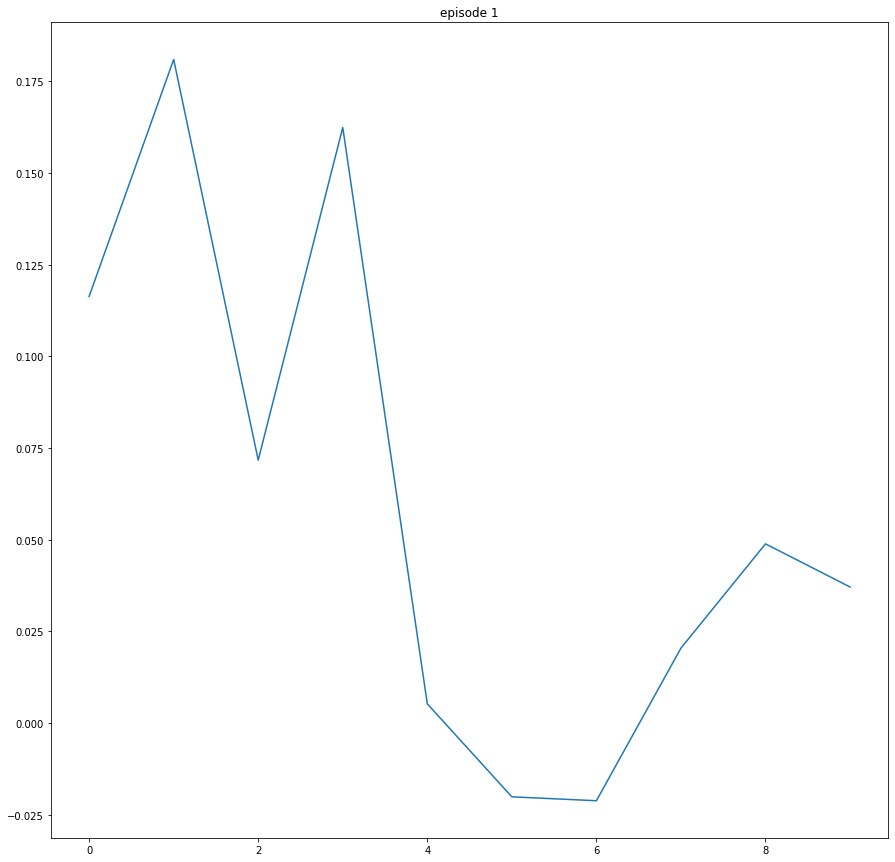

In [24]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['episodes'].index[0])
plt.show()

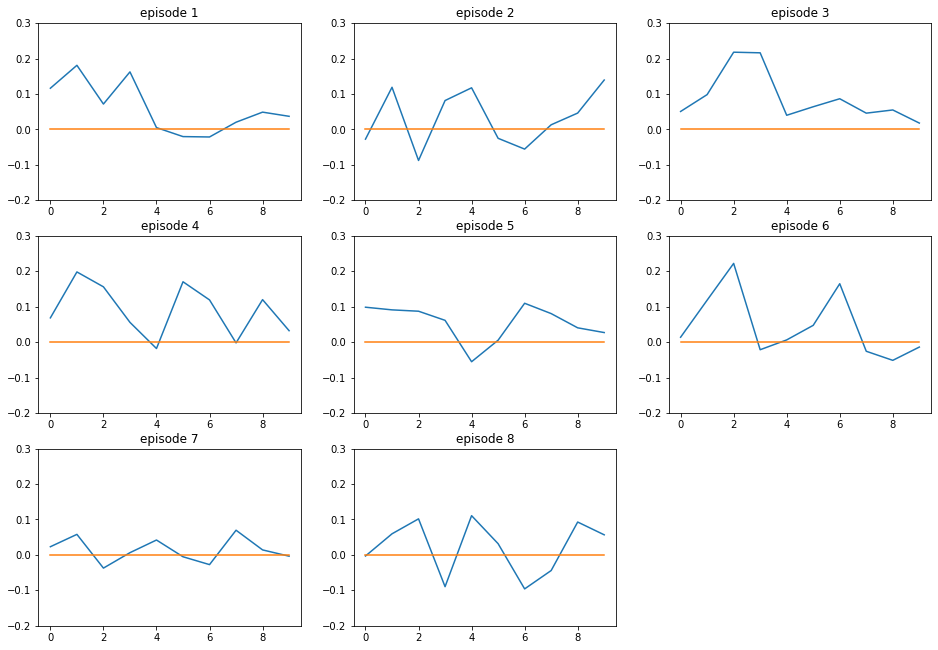

In [25]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 15]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['episodes'][index])
    plt.ylim(ymin=-.2, ymax=.3)
file_name = "sentiment_analysis_over_time.png"  # Specify the desired file name and extension
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)
    
plt.show()

In [26]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,45)
    list_pieces.append(split)
    
list_pieces

[['Original release date: November\xa023,\xa02022 Wednesday Addams, a high-school student, finds her brother\xa0Pugsley\xa0tied up in a locker. She sees a psychic vision of his bullies whom she attempts to kill in revenge but gets expelled. Her parents,\xa0Morticia\xa0and\xa0Gomez, decide to enroll her in Nevermore Academy, a school for outcasts. Meanwhile, a hiker is killed by an unknown creature near Nevermore. Wednesday’s parents release\xa0Thing, a sentient disembodied hand, to watch over her. She meets her roommate Enid, her complete opposite, and duels with Bianca, the popular girl, after she bullies another boy, Rowan. Later, Wednesday is nearly killed by a falling gargoyle but is saved by Bianca’s ex-boyfriend Xavie',
  'r. After escaping her court-ordered therapy session, Wednesday meets Tyler, who agrees to help her escape from Nevermore. However, she is apprehended by principal Larissa Weems and taken back to the school. Later, Tyler and Wednesday meet at the local fair, and

In [27]:
len(list_pieces)

8

In [28]:
len(list_pieces[0])

45

In [29]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    

polarity_transcript

[[0.07500000000000001,
  -0.06000000000000001,
  0.32857142857142857,
  0.10000000000000002,
  0.1557692307692308,
  0.17519841269841271,
  0.23186813186813188,
  0.2723484848484849,
  0.12650046382189242,
  0.1,
  0.13409090909090912,
  0.13094035594035594,
  0.009737076648841355,
  0.23232142857142857,
  0.19583333333333333,
  0.08452380952380951,
  0.07954545454545454,
  0.14793956043956044,
  0.03783068783068784,
  0.03833333333333336,
  -0.06547619047619047,
  -0.09209401709401711,
  0.16388888888888886,
  0.03200000000000001,
  -0.2222222222222222,
  0.046875,
  0.10833333333333334,
  0.1465909090909091,
  0.17346938775510207,
  -0.09476190476190478,
  -0.13333333333333333,
  0.05925925925925926,
  0.2833333333333334,
  -0.21041666666666664,
  -0.014756944444444454,
  0.013461538461538466,
  0.26458333333333334,
  0.032219169719169716,
  0.004545454545454544,
  0.1562770562770563,
  0.04249999999999999,
  -0.08482142857142858,
  -0.09149305555555556,
  -0.014761904761904764,
  0.

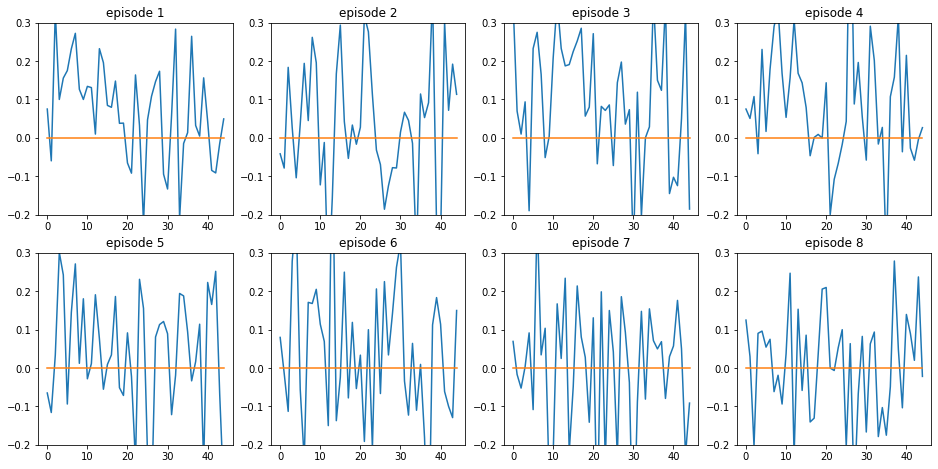

In [31]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,45), np.zeros(45))
    plt.title(data['episodes'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [32]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.subjectivity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.33888888888888885,
  0.3888888888888889,
  0.65,
  0.7416666666666667,
  0.6711538461538461,
  0.5687169312169312,
  0.6516483516483517,
  0.6424242424242425,
  0.5522124304267161,
  0.4666666666666666,
  0.3727272727272728,
  0.531595719095719,
  0.3855614973262032,
  0.5999603174603175,
  0.5759259259259258,
  0.3280423280423281,
  0.3837121212121212,
  0.658943833943834,
  0.5224867724867726,
  0.5066666666666666,
  0.5845238095238096,
  0.5337606837606838,
  0.39814814814814814,
  0.5279999999999999,
  0.5,
  0.5559027777777779,
  0.375,
  0.5761363636363637,
  0.6823129251700681,
  0.621904761904762,
  0.5166666666666667,
  0.6172839506172839,
  0.4333333333333333,
  0.6305555555555555,
  0.5637152777777777,
  0.617948717948718,
  0.5249999999999999,
  0.49511599511599513,
  0.7545454545454544,
  0.5598124098124098,
  0.5480555555555554,
  0.45059523809523816,
  0.43194444444444446,
  0.5635714285714286,
  0.6136363636363636],
 [0.5833333333333334,
  0.36666666666666664,
  0.2

In [33]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,30)
    list_pieces.append(split)
    
list_pieces

[['Original release date: November\xa023,\xa02022 Wednesday Addams, a high-school student, finds her brother\xa0Pugsley\xa0tied up in a locker. She sees a psychic vision of his bullies whom she attempts to kill in revenge but gets expelled. Her parents,\xa0Morticia\xa0and\xa0Gomez, decide to enroll her in Nevermore Academy, a school for outcasts. Meanwhile, a hiker is killed by an unknown creature near Nevermore. Wednesday’s parents release\xa0Thing, a sentient disembodied hand, to watch over her. She meets her roommate Enid, her complete opposite, and duels with Bianca, the popular girl, after she bullies another boy, Rowan. Later, Wednesday is nearly killed by a falling gargoyle but is saved by Bianca’s ex-boyfriend Xavier. After escaping her court-ordered therapy session, Wednesday meets Tyler, who agrees to help her escape from Nevermore. However, she is apprehended by principal Larissa Weems and taken back to the school. Later, Tyler and Wednesday meet at the local fair, and Wedne

In [34]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    

polarity_transcript

[[0.10576923076923077,
  0.07692307692307693,
  0.1885416666666667,
  0.12973057644110278,
  0.24750566893424036,
  0.15741702741702743,
  0.10064102564102566,
  0.15197450697450693,
  -0.0035121624407338714,
  0.2910714285714286,
  0.1707142857142857,
  0.05545634920634921,
  0.06479591836734697,
  -0.05140692640692641,
  0.029575163398692796,
  -0.0064999999999999945,
  -0.13392857142857142,
  0.08666666666666667,
  0.07152133580705011,
  -0.009841269841269843,
  -0.13809523809523808,
  0.17142857142857146,
  -0.19577546296296292,
  0.028472222222222232,
  0.24191919191919195,
  -0.0035997732426303808,
  -0.0021726190476190456,
  0.1314285714285714,
  -0.0353042328042328,
  0.013690476190476189],
 [0.03854166666666668,
  -0.0010989010989010865,
  -0.08214285714285713,
  0.030128205128205125,
  0.14583333333333334,
  0.2175925925925926,
  0.055238095238095246,
  -0.049047619047619055,
  -0.3272727272727272,
  0.041666666666666685,
  0.18659090909090909,
  -0.02115384615384614,
  0.021

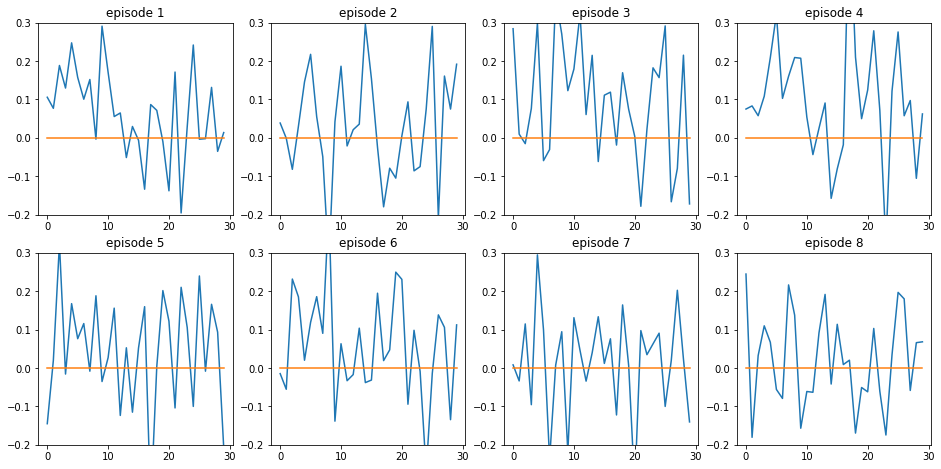

In [35]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,30), np.zeros(30))
    plt.title(data['episodes'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()